<a href="https://colab.research.google.com/github/ibe-abu-chi/python_EDA/blob/master/Airline_satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [180]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('airline_passenger_satisfaction.csv')

In [181]:
df. head(10)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
5,6,Male,43,Returning,Business,Business,3788,0,0.0,4,...,4,4,4,3,3,4,4,4,4,Satisfied
6,7,Male,43,Returning,Business,Business,1963,0,0.0,3,...,5,5,5,4,5,5,3,5,5,Satisfied
7,8,Female,60,Returning,Business,Business,853,0,3.0,3,...,3,4,4,4,4,3,4,3,3,Satisfied
8,9,Male,50,Returning,Business,Business,2607,0,0.0,1,...,4,3,4,3,3,4,4,4,4,Neutral or Dissatisfied
9,10,Female,38,Returning,Business,Business,2822,13,0.0,2,...,5,4,5,4,2,5,2,5,5,Satisfied


In [182]:
df.shape

(129880, 24)

In [183]:
df.dtypes

ID                                          int64
Gender                                     object
Age                                         int64
Customer Type                              object
Type of Travel                             object
Class                                      object
Flight Distance                             int64
Departure Delay                             int64
Arrival Delay                             float64
Departure and Arrival Time Convenience      int64
Ease of Online Booking                      int64
Check-in Service                            int64
Online Boarding                             int64
Gate Location                               int64
On-board Service                            int64
Seat Comfort                                int64
Leg Room Service                            int64
Cleanliness                                 int64
Food and Drink                              int64
In-flight Service                           int64


In [184]:
df.columns

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [185]:
# filling missing value using fillna() 
df.fillna(0)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied


In [186]:
df.isnull().any()

ID                                        False
Gender                                    False
Age                                       False
Customer Type                             False
Type of Travel                            False
Class                                     False
Flight Distance                           False
Departure Delay                           False
Arrival Delay                              True
Departure and Arrival Time Convenience    False
Ease of Online Booking                    False
Check-in Service                          False
Online Boarding                           False
Gate Location                             False
On-board Service                          False
Seat Comfort                              False
Leg Room Service                          False
Cleanliness                               False
Food and Drink                            False
In-flight Service                         False
In-flight Wifi Service                  

In [187]:
df['Arrival Delay'].fillna(0)

0          5.0
1         39.0
2          0.0
3          0.0
4          1.0
          ... 
129875     3.0
129876     0.0
129877    14.0
129878    22.0
129879     0.0
Name: Arrival Delay, Length: 129880, dtype: float64

In [188]:
df.isnull().any()

ID                                        False
Gender                                    False
Age                                       False
Customer Type                             False
Type of Travel                            False
Class                                     False
Flight Distance                           False
Departure Delay                           False
Arrival Delay                              True
Departure and Arrival Time Convenience    False
Ease of Online Booking                    False
Check-in Service                          False
Online Boarding                           False
Gate Location                             False
On-board Service                          False
Seat Comfort                              False
Leg Room Service                          False
Cleanliness                               False
Food and Drink                            False
In-flight Service                         False
In-flight Wifi Service                  

In [189]:
#Creating a dummy variable for sex status
df['Satisfaction'] = np.where(df['Satisfaction'] == "Satisfied", 0, 1)

In [190]:
#define the predictor variables and the response variable
X = df[['Flight Distance', 'Departure Delay', 'Ease of Online Booking',
          'Check-in Service', 'Online Boarding', 'Gate Location', 'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 
          'Food and Drink', 'In-flight Service', 'In-flight Entertainment', 'Baggage Handling']]
y = df['Satisfaction']

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

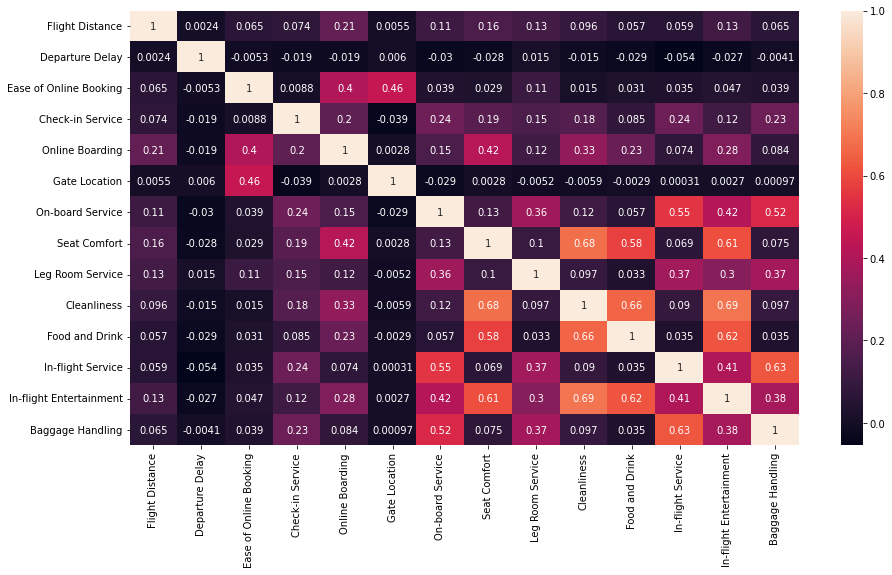

In [191]:
plt.figure(figsize = (15,8))
sns.heatmap(X.corr(), annot = True)

In [192]:
#instantiate the model
log_reg = LogisticRegression()

#fit the model using the training data
model = log_reg.fit(X_train,y_train)

#use model to make predictions on test data
y_pred = log_reg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [193]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[11708,  5178],
       [ 4562, 17516]])

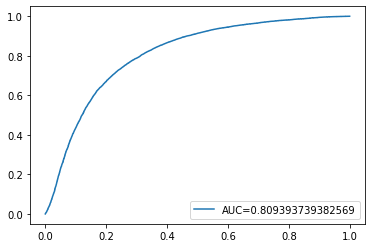

In [194]:
#define metrics
y_pred_proba = log_reg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)

In [195]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7500256647161483


In [196]:
import statsmodels.api as sm
import statsmodels.stats.api as sms

In [197]:
#define response variable
y = y

#define predictor variables
x = X

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [198]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Satisfaction   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     6260.
Date:                Thu, 03 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:11:01   Log-Likelihood:                -59651.
No. Observations:              129880   AIC:                         1.193e+05
Df Residuals:                  129865   BIC:                         1.195e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [199]:
# building the model and fitting the data
log_reg = sm.Logit(y_train, X_train).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.569390
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           Satisfaction   No. Observations:                90916
Model:                          Logit   Df Residuals:                    90902
Method:                           MLE   Df Model:                           13
Date:                Thu, 03 Nov 2022   Pseudo R-squ.:                  0.1684
Time:                        11:11:02   Log-Likelihood:                -51767.
converged:                       True   LL-Null:                       -62246.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Flight Distance            -0.0003   7.96e-06    -40.256      0.000      -0.000   